### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [3]:
df.info()       # DiscountRate 열에 결측값 1개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [4]:
df[df['DiscountRate'].isna()] = df['DiscountRate'].mean()       # 평균값으로 대체

C:\Users\lemon\AppData\Local\Temp\ipykernel_49888\2912435280.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1742857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['DiscountRate'].isna()] = df['DiscountRate'].mean()       # 평균값으로 대체
C:\Users\lemon\AppData\Local\Temp\ipykernel_49888\2912435280.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1742857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['DiscountRate'].isna()] = df['DiscountRate'].mean()       # 평균값으로 대체
C:\Users\lemon\AppData\Local\Temp\ipykernel_49888\2912435280.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1742857142857143' has dtype incompatible w

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%Y-%m-%d %H:%M', errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    float64       
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    float64       
 4   Price         120 non-null    float64       
 5   CustomerID    120 non-null    float64       
 6   Birthdate     120 non-null    object        
 7   OrderDate     119 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  120 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 9.5+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [7]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1.0,역사책,Books,5.0,37000.0,1071.0,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000.0
1,2.0,셔츠,Clothing,5.0,20000.0,1526.0,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000.0
2,3.0,노트북,Electronics,4.0,8000.0,1252.0,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000.0
3,4.0,자전거,Sports,1.0,8000.0,1670.0,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000.0
4,5.0,헤드폰,Electronics,3.0,26000.0,1838.0,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000.0
...,...,...,...,...,...,...,...,...,...,...,...
115,116.0,스마트워치,Electronics,1.0,33000.0,1508.0,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000.0
116,117.0,스마트워치,Electronics,4.0,41000.0,1645.0,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000.0
117,118.0,태블릿,Electronics,1.0,33000.0,1433.0,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000.0
118,119.0,청바지,Clothing,2.0,43000.0,1497.0,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000.0


In [8]:
import matplotlib.pyplot as plt

C:\Users\lemon\AppData\Local\Temp\ipykernel_49888\2818065177.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total = df['TotalRevenue'].resample('M').sum()


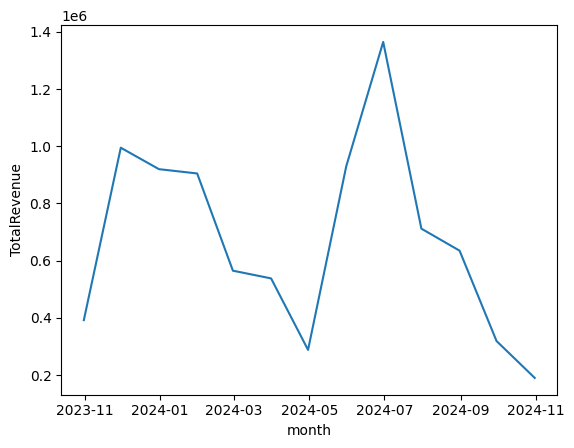

In [9]:
df = df.set_index('OrderDate')

monthly_total = df['TotalRevenue'].resample('M').sum()

plt.plot(monthly_total.index, monthly_total.values)
plt.xlabel('month')
plt.ylabel('TotalRevenue')
plt.show()

In [10]:
df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)

Category
Food           1801000.0
Electronics    1746000.0
Beauty         1493000.0
Name: TotalRevenue, dtype: float64

In [11]:
# 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

Country
미국      2238000.0
독일      1808000.0
중국      1766000.0
일본      1523000.0
대한민국    1419000.0
Name: TotalRevenue, dtype: float64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [12]:
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

CustomerID
1007.0    334000.0
1354.0    245000.0
1141.0    241000.0
1589.0    215000.0
1632.0    192000.0
Name: TotalRevenue, dtype: float64

In [13]:
df['CustomerID'].value_counts(ascending=False).head(5)

CustomerID
1206.0    2
1278.0    2
1496.0    2
1007.0    2
1673.0    2
Name: count, dtype: int64

In [14]:
df[df['Birthdate'].isna()]


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,Country,DiscountRate,TotalRevenue
OrderDate,,,,,,,,,,


In [15]:
# datetime으로 변환
df['Birthdate'] = pd.to_datetime(df['Birthdate'], errors='coerce', format='%Y-%m-%d')

df.info()       

# 결측값 하나는 평균값으로 대체
mean_date = df['Birthdate'].dropna().mean()
df['Birthdate'] = df['Birthdate'].fillna(mean_date)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2024-06-10 17:18:00 to 2024-06-29 10:28:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    float64       
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    float64       
 4   Price         120 non-null    float64       
 5   CustomerID    120 non-null    float64       
 6   Birthdate     119 non-null    datetime64[ns]
 7   Country       120 non-null    object        
 8   DiscountRate  120 non-null    float64       
 9   TotalRevenue  120 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 10.3+ KB


In [16]:
# 연령대 분류

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [17]:
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

Product
셔츠     25.0
립스틱    22.0
소설     21.0
역사책    20.0
커피     20.0
Name: Quantity, dtype: float64

In [18]:
groupby_capr = df.groupby(['Category', 'Product'])['Quantity'].sum()

groupby_capr.idxmax()[1]

'셔츠'

In [19]:
df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)

Product
자기계발    5.0
주스      5.0
커피      4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.